In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

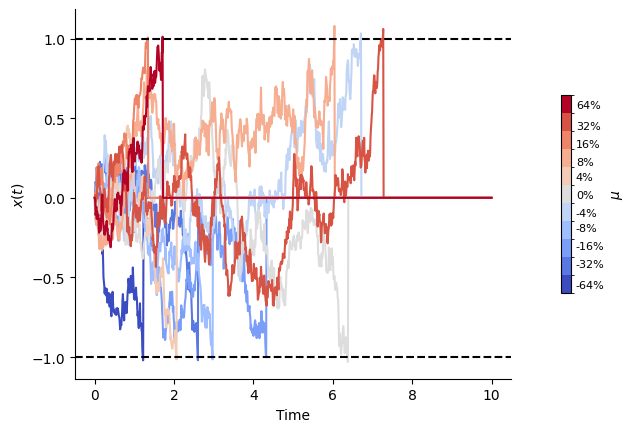

In [108]:


def DDM(mu, sigma, dt, total_time):
    num_trajectories = len(mu)
    num_steps = int(total_time / dt)
    x = np.zeros((num_trajectories, num_steps + 1))  
    
    for i in range(num_trajectories):
        for t in range(num_steps):
            if np.abs(x[i, t]) <= 1:
                x[i, t + 1] = x[i, t] + mu[i] * dt + sigma * np.sqrt(dt) * np.random.normal()
            else:
                break

    return x


mu = np.array([-0.64, -0.32, -0.16, -0.08, -0.04, 0, 0.04, 0.08, 0.16, 0.32, 0.64])  
sigma = 0.5   
dt = 0.01    
total_time = 10.0  
paths = DDM(mu, sigma, dt, total_time)

fig, ax = plt.subplots()
times = np.linspace(0, total_time, int(total_time / dt) + 1)

boundaries = np.concatenate(([mu[0] - (mu[1] - mu[0])/2], (mu[:-1] + mu[1:])/2, [mu[-1] + (mu[-1] - mu[-2])/2]))
norm = mcolors.BoundaryNorm(boundaries, ncolors=len(mu))
cmap = plt.get_cmap('coolwarm', len(mu))

for i, m in enumerate(mu):
    ax.plot(times, paths[i], color=cmap(norm(m)))

ax.axhline(y=1, color='black', linestyle='--')
ax.axhline(y=-1, color='black', linestyle='--')
ax.set_xlabel('Time')
ax.set_ylabel(r'$x(t)$')


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
 
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.1, ticks=mu)
cbar.ax.tick_params(size=0) 
cbar.set_label('$\mu$')
cbar.set_ticklabels([f'{100*m:.0f}%' for m in mu], fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.legend(bbox_to_anchor=[1.25, 1], loc='upper right')

